In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e8/sample_submission.csv
/kaggle/input/playground-series-s3e8/train.csv
/kaggle/input/playground-series-s3e8/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s3e8/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s3e8/test.csv')
train_data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
prediction = 'price'
predictor = ['carat','cut1','color1','clarity1','depth','table','x','y','z']

In [4]:
cut = {'Premium': 5, 'Very Good' : 4, 'Ideal' : 3, 'Good' : 2, 'Fair' : 1}
clarity = {'VVS2': 8, 'VVS1': 7, 'VS2': 6, 'VS1': 5, 'SI2': 4,'SI1': 3, 'I1': 2,'IF': 1}

In [5]:
from sklearn.preprocessing import LabelEncoder

color_encoder = LabelEncoder()

color_encoder.fit(train_data['color'])

train_data['cut1'] = [cut[i] for i in train_data.cut]
train_data['color1'] = color_encoder.transform(train_data['color'])
train_data['clarity1'] = [clarity[i] for i in train_data.clarity]

train_data.head()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut1,color1,clarity1
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619,5,2,6
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387,4,6,4
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772,3,3,5
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666,3,3,5
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453,5,3,6


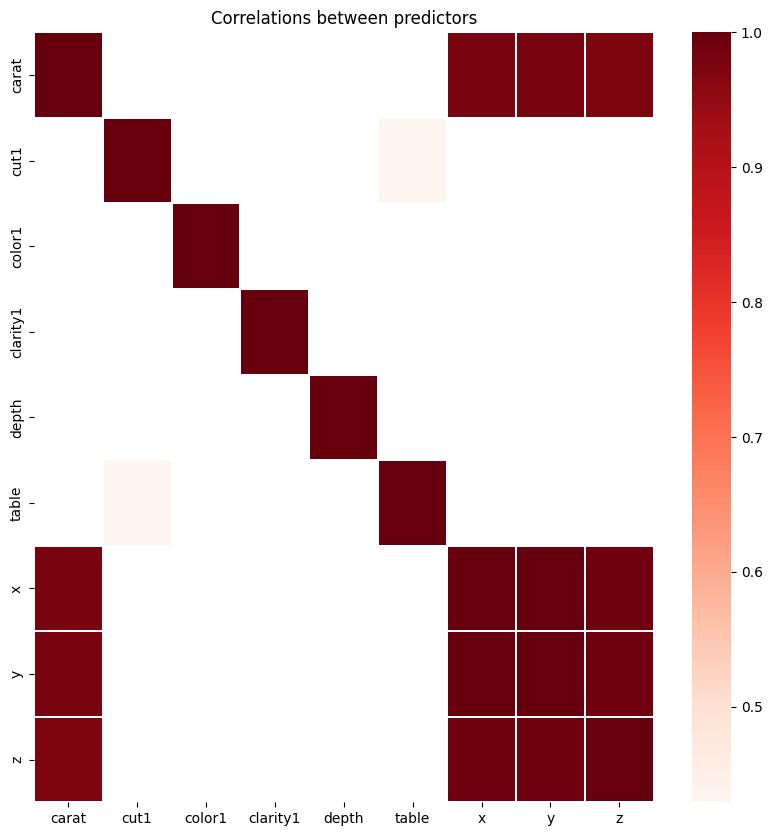

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
plt.title('Correlations between predictors')
corr = train_data[predictor].corr()
sns.heatmap(corr[abs(corr)>0.3],xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

carat, x, y and z are very highly correlated among themselves so we remove two of them from predictor variables

In [7]:
predictor.pop(0)
predictor.pop(6)
predictor.pop(6)

'z'

In [8]:
predictor

['cut1', 'color1', 'clarity1', 'depth', 'table', 'x']

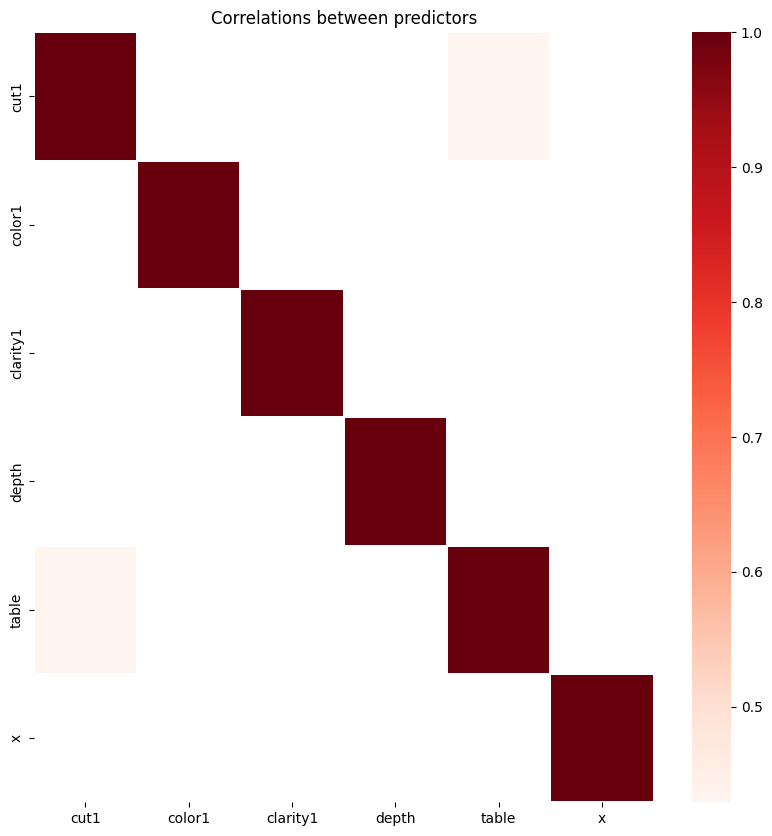

In [9]:
plt.figure(figsize = (10,10))
plt.title('Correlations between predictors')
corr = train_data[predictor].corr()
sns.heatmap(corr[abs(corr)>0.3],xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [10]:
train_data.shape

(193573, 14)

In [11]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(train_data,test_size = 0.2)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(
    max_depth=5, learning_rate=0.05, n_estimators=500,
    n_iter_no_change=10, random_state=42)
gbrt.fit(train[predictor], train['price'])

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [27]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50])
mlp_reg.fit(train[predictor], train['price'])

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(hidden_layer_sizes=[50, 50, 50])

In [13]:
test_data['cut1'] = [cut[i] for i in test_data.cut]
test_data['color1'] = color_encoder.transform(test_data['color'])
test_data['clarity1'] = [clarity[i] for i in test_data.clarity]

In [28]:
valid['predicted'] = mlp_reg.predict(valid[predictor])

In [15]:
from sklearn.metrics import r2_score

In [29]:
r2_score(valid['price'],valid['predicted'])

0.9430300053801648

In [17]:
test_data.isna().sum()

id          0
carat       0
cut         0
color       0
clarity     0
depth       0
table       0
x           0
y           0
z           0
cut1        0
color1      0
clarity1    0
dtype: int64

In [30]:
test_data['price'] = mlp_reg.predict(test_data[predictor])

In [21]:
test_data.set_index('id',inplace = True)

In [31]:
test_data['price'].to_csv('/kaggle/working/submission.csv')